# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. There were suggestions that movie ratings on Fandango are generally high or very high, and Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible.

In this project, we will analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Data Source

Walt Hickey made the data he analyzed publicly available on GitHub. We will use the data he collected to analyze the characteristics of Fandango's rating system **before** his analysis.

There is also collected movie ratings data publicly available for movies released in 2016 and 2017. We will use it to analyze the rating system's characteristics **after** Hickey's analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
import datetime as dt
pd.options.display.max_columns = None

In [2]:
data_before = pd.read_csv(r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_11\fandango_score_comparison.csv')

In [3]:
data_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [4]:
data_after = pd.read_csv(r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_11\movie_ratings_16_17.csv')

In [5]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [6]:
#isolate the columns on Fandango's ratings for the before dataset
data_before_fan = data_before.loc[:,['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()
data_before_fan.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
#isolate the columns on Fandango's ratings for the after dataset
data_after_fan = data_after.loc[:,['movie','year','fandango']].copy()
data_after_fan.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


For the dataset before Hickey's analysis, the data from Fandango was pulled on 24 Aug 2015, and only included movies with at least 30 fan reviews.

For the dataset after Hickey's analysis, the data was pulled on 22 Mar 2017, with movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017.

We can conclude that the samples might not be representative of the population as not all movies across a long time period were included.

## Changing the Goal

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

With the new goal, we now have two populations that we want to describe and compare with each other:
* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We will use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

In [8]:
#check if samples contain popular movies (i.e with more than 30 fan ratings)
sum(data_before_fan['Fandango_votes'] < 30)

0

In [9]:
#randomly generaete 10 movies from sample and check the number of reviews from the website
data_after_fan.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [10]:
#create a column indicating the year of movie
pattern = r"((?<=\()\d+(?=\)))"
data_before_fan['year'] = data_before_fan['FILM'].str.extract(pattern)

In [11]:
data_before_fan['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

From the above, we found out that there are movies from 2014 that are included in the **before** dataset which should be removed.

In [12]:
data_before_fan = data_before_fan[data_before_fan['year'] == '2015']

In [13]:
data_before_fan.shape

(129, 6)

In [14]:
data_after_fan['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Similarly, there are movies from 2017 in the **after** dataset which should be removed.

In [15]:
data_after_fan = data_after_fan[data_after_fan['year'] == 2016]

In [16]:
data_after_fan.shape

(191, 3)

## Analysing the Data

Let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

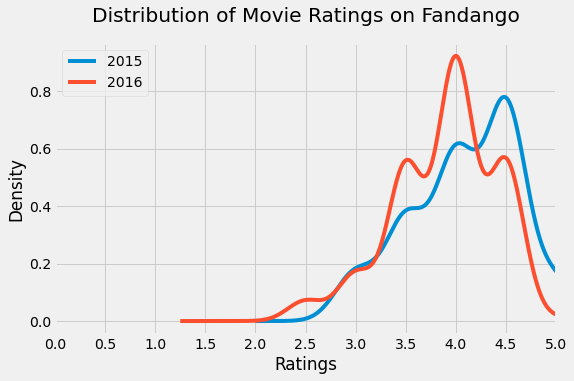

In [17]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8,5))
data_before_fan['Fandango_Stars'].plot.kde()
data_after_fan['fandango'].plot.kde()

plt.title('Distribution of Movie Ratings on Fandango', y=1.05)
plt.xlabel('Ratings')
ax.set_xticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.xlim(0,5)
ax.legend(['2015','2016'])
plt.show()

We notice that both datasets are left skewed, suggesting that most popular movies are rated quite highly for both 2015 and 2016.

However, movies in 2016 are rated slighly less highly as compared to movies in 2015 and there were also almost no movie in 2016 rated as 5.0. This possibly suggests a fairer system adopted for rating since Hickey's analysis.

### Analysing using frequency distribution tables

In [18]:
freq_before = (data_before_fan['Fandango_Stars'].value_counts(normalize=True) * 100).sort_index()

In [19]:
freq_after = (data_after_fan['fandango'].value_counts(normalize=True) * 100).sort_index()

In [20]:
merge_freq = pd.merge(freq_before, freq_after, left_index=True, right_index=True, how='outer').rename(
    {'Fandango_Stars':2015,'fandango':2016}, axis=1)

In [21]:
merge_freq

,2015,2016
2.5,NaN,3.141361
3.0,8.527132,7.329843
3.5,17.829457,24.083770
4.0,28.682171,40.314136
4.5,37.984496,24.607330
5.0,6.976744,0.523560


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determining the Direction of Change

We will take a couple of summary statistics to get a more precise picture about the direction of the difference. We will take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [24]:
mean_before = data_before_fan['Fandango_Stars'].mean()
median_before = data_before_fan['Fandango_Stars'].median()
mode_before = data_before_fan['Fandango_Stars'].mode()[0]

mean_after = data_after_fan['fandango'].mean()
median_after = data_after_fan['fandango'].median()
mode_after = data_after_fan['fandango'].mode()[0]

summary = pd.DataFrame(index=['mean','median','mode'])
summary['2015'] = [mean_before, median_before, mode_before]
summary['2016'] = [mean_after, median_after, mode_after]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.